In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Rezultate_Bacalaureat_Sesiunea_I_II_2015_2017.csv']


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('../input/Rezultate_Bacalaureat_Sesiunea_I_II_2015_2017.csv')
print(df.columns)

Index(['Unnamed: 0', 'CONTESTATIE_EA', 'CONTESTATIE_EB', 'CONTESTATIE_EC',
       'CONTESTATIE_ED', 'Clasa', 'Cod unic candidat', 'Dataset', 'Fileira',
       'Forma de învățământ', 'ITA', 'Limba modernă', 'Medie',
       'Mediu candidat', 'NOTA_CONTESTATIE_EA', 'NOTA_CONTESTATIE_EB',
       'NOTA_CONTESTATIE_EC', 'NOTA_CONTESTATIE_ED', 'NOTA_EA', 'NOTA_EB',
       'NOTA_EC', 'NOTA_ED', 'NOTE_RECUN_A', 'NOTE_RECUN_B', 'NOTE_RECUN_C',
       'NOTE_RECUN_D', 'NOTE_RECUN_EA', 'NOTE_RECUN_EB', 'NOTE_RECUN_EC',
       'NOTE_RECUN_ED', 'ORAL_IO', 'ORAL_PMO', 'PUNCTAJ DIGITALE', 'Profil',
       'Promoție', 'SCOALA', 'SCRIS_ITC', 'SCRIS_PMS', 'STATUS', 'STATUS_A',
       'STATUS_B', 'STATUS_C', 'STATUS_D', 'STATUS_EA', 'STATUS_EB',
       'STATUS_EC', 'STATUS_ED', 'Sex', 'Specializare', 'Subiect ea',
       'Subiect eb', 'Subiect ec', 'Subiect ed', 'Unitate (SIIIR)',
       'Unitate (SIRUES)'],
      dtype='object')


In [19]:
# Pass rate
passed = df.loc[df['STATUS'] == 'Promovat']
npassed = df.loc[df['STATUS'] == 'Nepromovat']
nr_pass = len(passed)
nr_npass = len(npassed)
print("Passed: {}".format(nr_pass))
print("Not passed: {}".format(nr_npass))
print("Pass rate: {}".format(nr_pass / (nr_pass + nr_npass)))

Passed: 318984
Not passed: 206571
Pass rate: 0.6069469418043782


Mediu candidat
RURAL    7.263019
URBAN    7.678088
Name: Medie, dtype: float64


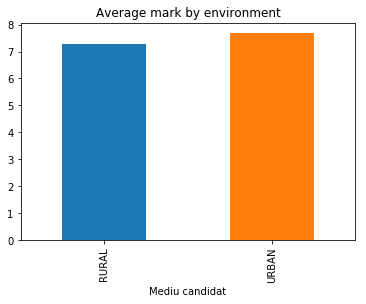

In [20]:
# Average by environment
by_env = df.groupby('Mediu candidat').mean()['Medie']
print(by_env)
by_env.plot.bar(title='Average mark by environment')

Specializare
Tehnician pentru animale de companie    5.964167
Tehnician prelucrări la cald            6.006232
Tehnician în prelucrarea lemnului       6.070861
Tehnician zootehnist                    6.082500
Teologie Musulmană                      6.118000
Name: Medie, dtype: float64
Specializare
Matematica-informatica    8.875901
Matematica-Informatica    8.135754
Științe ale Naturii       8.014251
Învăţător - educatoare    7.930287
Teologie Baptistă         7.820093
Name: Medie, dtype: float64


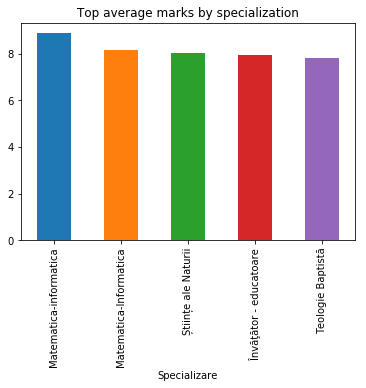

In [21]:
# Average by specialty
by_spec = df.groupby('Specializare').mean()['Medie']
print(by_spec.sort_values().head(5))
print(by_spec.sort_values(ascending=False).head(5))
by_spec.sort_values(ascending=False).head(5).plot.bar(title='Top average marks by specialization')

Subiect ec
Matematică TEHN         6.953137
Istorie                 7.534298
Matematică PED          7.930287
Matematică ST-NAT       8.014251
Matematică MATE-INFO    8.144783
Name: Medie, dtype: float64


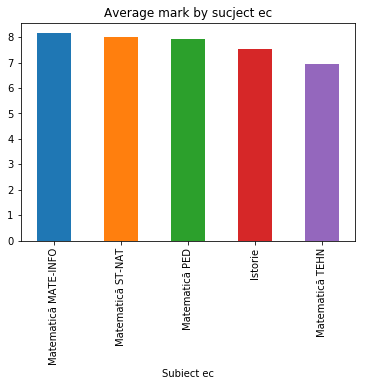

In [22]:
# Average marks by profile subject
by_subject_c = df.groupby('Subiect ec').mean()['Medie']
print(by_subject_c.sort_values())
by_subject_c.sort_values(ascending=False).plot.bar(title='Average mark by sucject ec')

Experimentat    333363
Avansat         155620
Mediu            76000
Absent           12189
Fara nivel        1446
Eliminat            46
Name: STATUS_A, dtype: int64


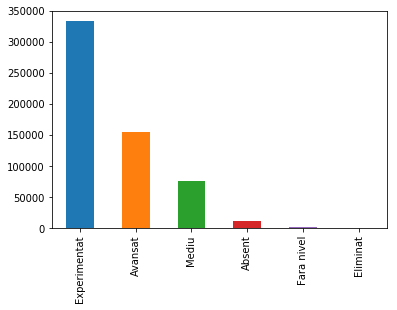

In [23]:
# Distribution of second language levels
by_status_a = df['STATUS_A'].value_counts()
print(by_status_a)
by_status_a.plot.bar()

In [24]:
# Students who contested at least one result
df2 = df[np.logical_or.reduce([df[col] == 'Da' for col in ['CONTESTATIE_EA', 'CONTESTATIE_EB', 'CONTESTATIE_EC', 'CONTESTATIE_ED']])]
print("Total students: {}; Number of students who contested the results: {}; Percentage: {}".format(len(df), len(df2), len(df2) / len(df)))

Total students: 578664; Number of students who contested the results: 121304; Percentage: 0.20962769413683935


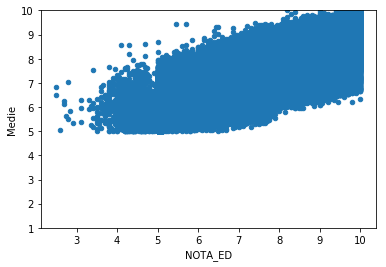

In [25]:
# Correlation between the mark from the chosen subject and the average one
var = 'NOTA_ED'
data = pd.concat([df['Medie'], df[var]], axis=1)
data.plot.scatter(x=var, y='Medie', ylim=(1, 10));

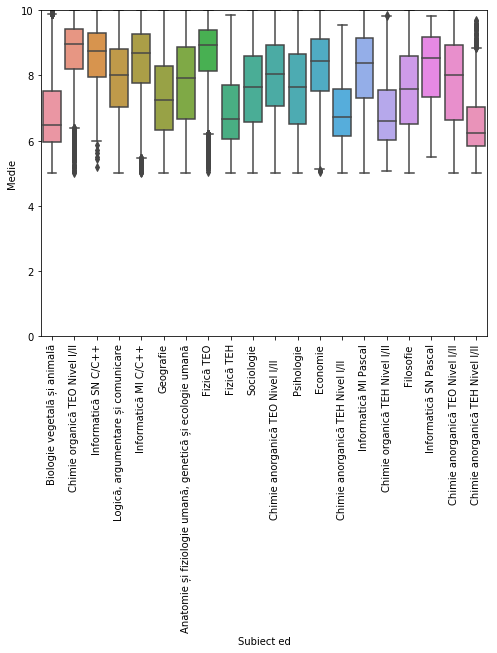

In [26]:
# Distribution of average mark by chosen subject
var = 'Subiect ed'
data = pd.concat([df['Medie'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=90)
fig = sns.boxplot(x=var, y="Medie", data=data)
fig.axis(ymin=0, ymax=10);

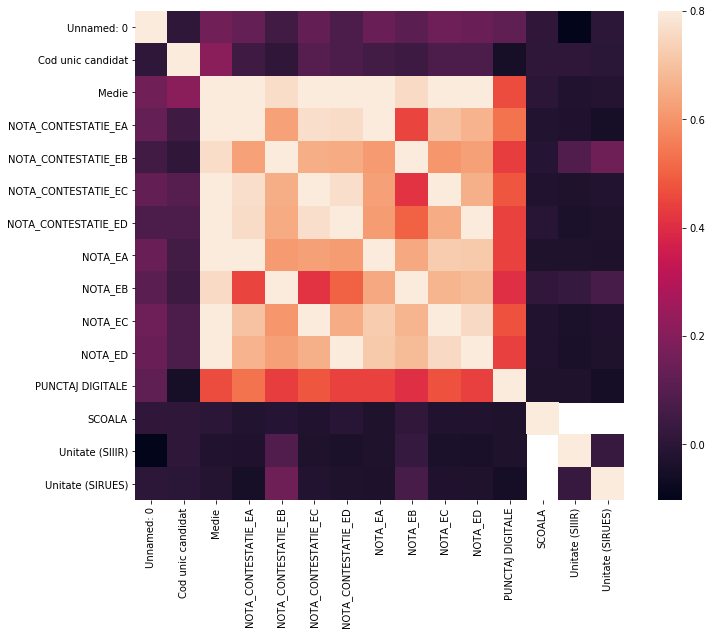

In [27]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);